# Understanding Tree SHAP for Simple Models
The SHAP value for a feature is the average change in model output by conditioning on that feature when introducing features one at a time over all feature orderings. While this is easy to state, it is challenging to compute. So this notebook is meant to give a few simple examples where we can see how this plays out for very small trees. For arbitrary large trees it is very hard to intuitively guess these values by looking at the tree.

In [1]:
import sklearn
import shap
import numpy as np
import graphviz

## Single split example

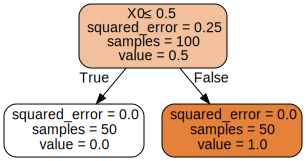

In [2]:
# build data
N = 100
M = 4
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[:N//2, 0] = 1
y[:N//2] = 1

# fit model
single_split_model = sklearn.tree.DecisionTreeRegressor(max_depth=1)
single_split_model.fit(X, y)

# draw model
dot_data = sklearn.tree.export_graphviz(single_split_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Explain the model
Note that the bias term is the expected output of the model over the training dataset (0.5). The SHAP value for features not used in the model is always 0, while for 𝑥0 it is just the difference between the expected value (0.5) and the output of the model (0 or 1).

In [3]:
xs = [np.ones(M), np.zeros(M)]
for x in xs:
    print()
    print("          x =", x)
    print("shap_values =", shap.TreeExplainer(single_split_model).shap_values(x))



          x = [1. 1. 1. 1.]
shap_values = [0.5 0.  0.  0. ]

          x = [0. 0. 0. 0.]
shap_values = [-0.5  0.   0.   0. ]


In [15]:
x = xs[1]
explainer = shap.TreeExplainer(single_split_model)
shap_values = explainer.shap_values(x)

shap.force_plot(explainer.expected_value, shap_values)

## Two feature AND example

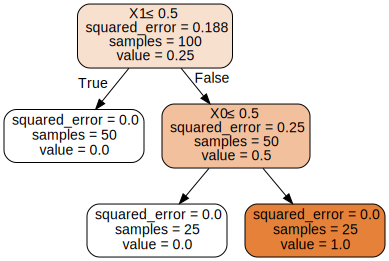

In [17]:
# build data
N = 100
M = 4
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[:1 * N//4, 1] = 1
X[:N//2, 0] = 1
X[N//2:3 * N//4, 1] = 1
y[:1 * N//4] = 1

# fit model
and_model = sklearn.tree.DecisionTreeRegressor(max_depth=2)
and_model.fit(X, y)

# draw model
dot_data = sklearn.tree.export_graphviz(and_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Explain the model
Note that the bias term is the expected output of the model over the training dataset (0.25). The SHAP value for features not used in the model is always 0, while for 𝑥0 and 𝑥1 it is just the difference between the expected value and the output of the model split equally between them (since they equally contribute to the AND function).

In [18]:
xs = [np.ones(M), np.zeros(M)]
for x in xs:
    print()
    print("          x =", x)
    print("shap_values =", shap.TreeExplainer(and_model).shap_values(x))


          x = [1. 1. 1. 1.]
shap_values = [0.375 0.375 0.    0.   ]

          x = [0. 0. 0. 0.]
shap_values = [-0.125 -0.125  0.     0.   ]


In [21]:
x = np.array([1,0,0,0])
explainer = shap.TreeExplainer(and_model)
shap_values = explainer.shap_values(x)

shap.force_plot(explainer.expected_value, shap_values)

In [22]:
shap_values

array([ 0.125, -0.375,  0.   ,  0.   ])

In [23]:
explainer.expected_value

array([0.25])